# Optimising the DEMO design under uncertainty

This work introduces a statistical approach for evaluating power plant designs
under uncertainty and optimising for reliability 
and confidence in the design.


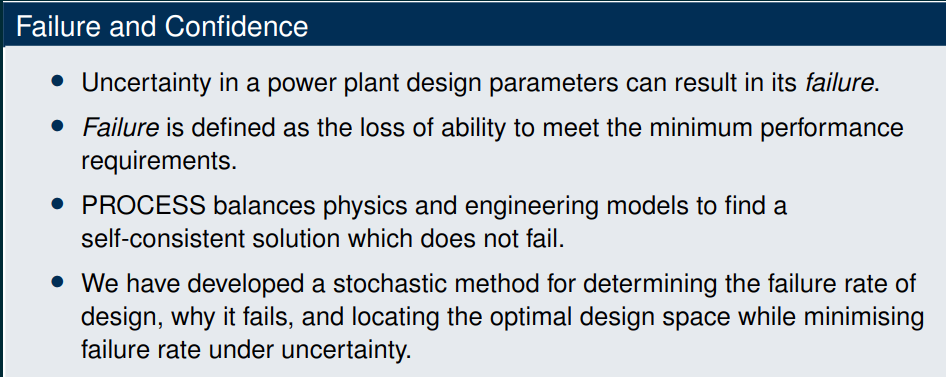

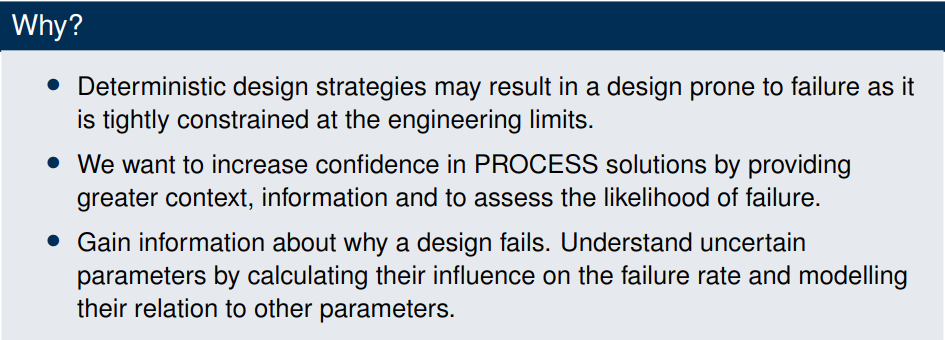

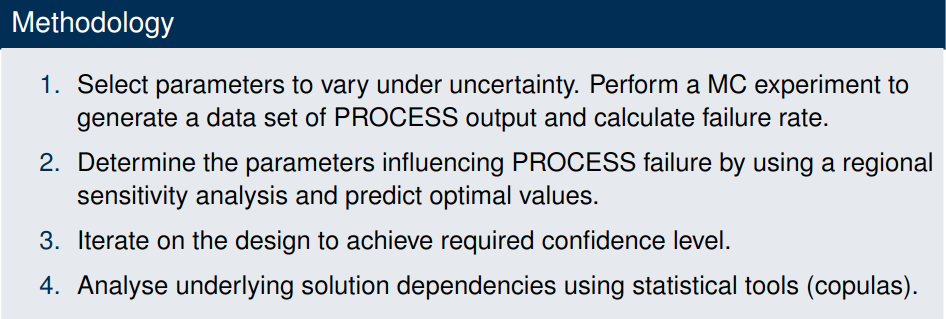

## Step 1: Define Uncertain Parameters

These bounds have been selected from past papers, and and are modelled as uniform distributions.

Unresolved task: how can we more carefully define these bounds and probability distributions?


| Parameter         | Distribution               |
|-------------------|----------------------------|
| coreradius        | Uniform(0.6, 0.9)          |
| ralpne            | Uniform(0.072, 0.0761)     |
| psepbqarmax       | Uniform(7.36, 11.04)       |
| tbrnmn            | Uniform(6954.0, 12722.0)   |
| etaech            | Uniform(0.32, 0.48)        |
| pinjalw           | Uniform(40.0, 60.0)        |
| triang            | Uniform(0.4, 0.6)          |
| alstroh           | Uniform(528000000.0, 792000000.0) |
| sig_tf_case_max   | Uniform(464000000.0, 696000000.0) |
| walalw            | Uniform(6.4, 9.6)          |
| sig_tf_wp_max     | Uniform(528000000.0, 792000000.0) |
| aspect            | Uniform(2.78, 2.94)        |
| etath             | Uniform(0.35, 0.405)       |


Note: In the following data the bounds for some parameters have been reduced, including the aspect ratio and minimum burn time.

Note: The data presented here was used to aid development, it does not represent a conclusive result.

# Optimising the DEMO design under uncertainty

### Concept

This work introduces a statistical approach for evaluating power plant designs
under uncertainty and optimising for reliability

- To leverage the use of statistics to lend greater credibility to PROCESS power plant design.
- To develop a concept of design "reliability".
- To understand why a design is "reliable", to map the interactions between uncertain parameters.
- Value-of-information (VoI) analysis to quantify the value of gaining information about a given uncertain parameter.

### Brief intro to Uncertainty
There are two ways to categorise uncertainties:
1. "Alleatory" uncertainties are irreducible and arise from inherent randomness in natural processes.
2. "Epistimic" uncertainies are a result of incomplete knowledge of a system.

### Method

- Power plants are design with some essential requirements in mind, for example it must achieve 500 MW net electric power output.
- In PROCESS we have a solver which will either converge, or not, subject to a set of input parameters and minimum requirements.
- If PROCESS cannot find a self-consistent solution to a given input, 

In [1]:
itv=[
            "bt",
            "te",
            "beta",
            "dene",
            "tfcth",
            "wallmw",
            "ohcth",
            "bigq",
            "bore",
            "betalim",
            "coheof",
            "cohbop",
            "fvsbrnni",
            "itvar019",
            # "itvar020",
            "jwptf",
            # "vtfskv",
            #"vdalw",
            "tdmptf",
            "thkcas",
            "thwcndut",
            "fcutfsu",
            "cpttf",
            "plhthresh",
            "tmargtf",
            "tmargoh",
            "oh_steel_frac",
            "pdivt",
            ]

qois = [
        "ifail",
        "sqsumsq",
        "bt",
        "te",
        "beta",
        "dene",
        "tfcth",
        "wallmw",
        "ohcth",
        "bigq",
        "bore",
        "betalim",
        "coheof",
        "cohbop",
        "kappa",
        "fvsbrnni",
        "itvar019",
        "itvar020",
        "jwptf",
        "vtfskv",
        "vdalw",
        "tdmptf",
        "thkcas",
        "thwcndut",
        "fcutfsu",
        "cpttf",
        "plhthresh",
        "tmargtf",
        "tmargoh",
        "oh_steel_frac",
        "pdivt",
        "powfmw",
        "rmajor",
        # "n_cycle"
]

In [2]:
# %load_ext autoreload
# %autoreload 1
from pathlib import Path
from bokeh.plotting import figure, show
import sys
import pandas as pd
sys.path.append('/home/graeme/process_uq/uq_tools')
sys.path.append('/home/graeme/PROCESS_SALib/')
sys.path.insert(0, '/home/graeme/process_uq/')
# from uq_analysis import UncertaintyData, Copula, ConfidenceAnalysis
from uncertainty_data import UncertaintyData
from copula import Copula
from confidence_analysis import ConfidenceAnalysis
# from bokeh.plotting import figure 
from bokeh.io import output_notebook
output_notebook()
proj_dir = str(Path.cwd())+"/"
proj_dir = "/home/graeme/easyVVUQ-process/demo_analysis/"
figure_of_merit = "rmajor"
input_names = [
            "coreradius",
            "ralpne",
            "psepbqarmax",
            "tbrnmn",
            "etaech",
            "pinjalw",
            "triang",
            "alstroh",
            "sig_tf_case_max",
            "walalw",
            "sig_tf_wp_max",
            "aspect",
            "etath",
            "n_cycle_min"
        ]
input_names_2=  [
            "coreradius",
            "ralpne",
            "psepbqarmax",
            "etaech",
            "pinjalw",
            "alstroh",
            "sig_tf_case_max",
            "walalw",
            "sig_tf_wp_max",
            "n_cycle_min"
        ]
demo_1_uq_data = UncertaintyData("/home/graeme/easyVVUQ-process/demo_runs_2/run1/", figure_of_merit, input_parameters = input_names, use_scoping_data=False)
demo_1_uq_data.calculate_sensitivity(figure_of_merit)
demo_1_uq_data.calculate_failure_probability()
demo_2_uq_data = UncertaintyData("/home/graeme/easyVVUQ-process/demo_runs_2/run2/", figure_of_merit, input_parameters = input_names, use_scoping_data=False)
demo_2_uq_data.calculate_sensitivity(figure_of_merit)
demo_2_uq_data.calculate_failure_probability()
demo_3_uq_data = UncertaintyData("/home/graeme/easyVVUQ-process/demo_runs_2/run3/", figure_of_merit, input_parameters = input_names, use_scoping_data=False)
demo_3_uq_data.calculate_sensitivity(figure_of_merit)
demo_3_uq_data.calculate_failure_probability()
demo_4_uq_data = UncertaintyData("/home/graeme/easyVVUQ-process/demo_runs_2/run4/", figure_of_merit, input_parameters = input_names, use_scoping_data=False)
demo_4_uq_data.calculate_sensitivity(figure_of_merit)
demo_4_uq_data.calculate_failure_probability()
demo_5_uq_data = UncertaintyData("/home/graeme/easyVVUQ-process/demo_runs_2/run5/", figure_of_merit, input_parameters = input_names, use_scoping_data=False)
demo_5_uq_data.calculate_sensitivity(figure_of_merit)
demo_5_uq_data.calculate_failure_probability()
demo_6_uq_data = UncertaintyData("/home/graeme/easyVVUQ-process/demo_runs_2/run6/", figure_of_merit, input_parameters = input_names, use_scoping_data=False)
demo_6_uq_data.calculate_sensitivity(figure_of_merit)
demo_6_uq_data.calculate_failure_probability()
demo_7_uq_data = UncertaintyData("/home/graeme/easyVVUQ-process/demo_runs_2/run7/", figure_of_merit, input_parameters = input_names, use_scoping_data=False)
demo_7_uq_data.calculate_sensitivity(figure_of_merit)
demo_7_uq_data.calculate_failure_probability()
demo_8_uq_data = UncertaintyData("/home/graeme/easyVVUQ-process/demo_runs_2/run8/", figure_of_merit, input_parameters = input_names, use_scoping_data=False)
demo_8_uq_data.calculate_sensitivity(figure_of_merit)
demo_8_uq_data.calculate_failure_probability()
demo_9_uq_data = UncertaintyData("/home/graeme/easyVVUQ-process/demo_runs_2/run9/", figure_of_merit, input_parameters =  [
            "coreradius",
            "ralpne",
            "psepbqarmax",
            "etaech",
            "pinjalw",
            "alstroh",
            "sig_tf_case_max",
            "walalw",
            "sig_tf_wp_max",
            "n_cycle_min"
        ], use_scoping_data=False)
demo_9_uq_data.calculate_sensitivity(figure_of_merit)
demo_9_uq_data.calculate_failure_probability()

ImportError: cannot import name 'ConfidenceAnalysis' from 'uncertainty_data' (/home/graeme/process_uq/uq_tools/uncertainty_data.py)

In [ ]:
print("Number of samples: ", len(demo_1_uq_data.uncertainties_df))
print("Number of converged runs: ",demo_1_uq_data.number_of_converged_runs,)
print("Confidence: ", round(1-demo_1_uq_data.failure_probability,2),"+/-", demo_1_uq_data.failure_cov)
demo_1_uq_data.convergence_regional_sensitivity_analysis(demo_1_uq_data.input_names)
demo_1_uq_data.plot_sumsq_sensitivity()
demo_1_sigvar = demo_1_uq_data.find_significant_parameters(demo_1_uq_data.sumsq_sensitivity_df,"unconverged",0.2).tolist()
print("Ranked influence on convergence")
print(demo_1_sigvar)
outputs = ["powfmw","rmajor","bore","bt","kappa","tfcth"]
demo_1_con_analysis=ConfidenceAnalysis(demo_1_uq_data,input_names=input_names+outputs, weight_confidence=1.0,weight_overlap=1.0)#,custom_data_point=custom_data)
demo_1_con_analysis.run()
show(demo_1_con_analysis.create_graph_grid(input_names+outputs))
show(demo_1_con_analysis.create_datatable(input_names))
    